# Linear Regression

We want to predict future temperature given the current real-time weather data returned by IoT sensors. 

The linear regression model is first trained on a publicly available [historical weather dataset](https://github.com/amcquistan/WeatherPredictPythonML) collected using the [Weather Underground API](https://www.wunderground.com/). This dataset contains weather metrics from 1/4/15 to 9/27/17 for the city of Lincoln, Nebraska. For each variable, metrics going three days back are collected. We followed this tutorial in training the model: [https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-2/](https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-2/).

For future training, data from the IoT sensors can be included.



### Note: Please use [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true) to run this notebook.

### Prerequisites: 
Upload the **historical_weather_data.csv** file using the Files tab in Google Colab.

### Downgrade a particular library that is needed later.
Google Colab's version of this library is not compatible with another library (statsmodel) that is used later.

In [1]:
# This is necessary to avoid incompatibility issues with statsmodels library which is needed later.
# It will show an error for another library, but that's okay since we won't need that other library.
!pip install scipy==1.2.1

     |████████████████████████████████| 24.8MB 1.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


### Save the data into a pandas dataframe.


In [0]:
import pandas as pd
df = pd.read_csv('historical_weather_data.csv').set_index('date')

### Assess the correlation in the data.
This will output the correlation values from most negatively correlated to the most positively correlated.

In [3]:
df.corr()[['meantempm']].sort_values('meantempm')

,meantempm
maxpressurem_1,-0.519699
maxpressurem_2,-0.425666
maxpressurem_3,-0.408902
meanpressurem_1,-0.365682
meanpressurem_2,-0.269896
meanpressurem_3,-0.263008
minpressurem_1,-0.201003
minhumidity_1,-0.148602
minhumidity_2,-0.143211
minhumidity_3,-0.118564


### Select variables of interest.
Features that have correlation values less than the absolute value of 0.6 are removed.

Since the mintempm and maxtempm variables are for the same day as the prediction variable meantempm, they are also removed.

A new DataFrame that contains only the variables of interest is created.

In [0]:
predictors = ['meantempm_1',  'meantempm_2',  'meantempm_3', 
              'mintempm_1',   'mintempm_2',   'mintempm_3',
              'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
              'maxdewptm_1',  'maxdewptm_2',  'maxdewptm_3',
              'mindewptm_1',  'mindewptm_2',  'mindewptm_3',
              'maxtempm_1',   'maxtempm_2',   'maxtempm_3']
df2 = df[['meantempm'] + predictors]

### Plot the relationship of each predictor to meantempm.
The value for future mean temperature is what we want to predict. This plot will give us a visual of the relationship of each feature against the mean temp.

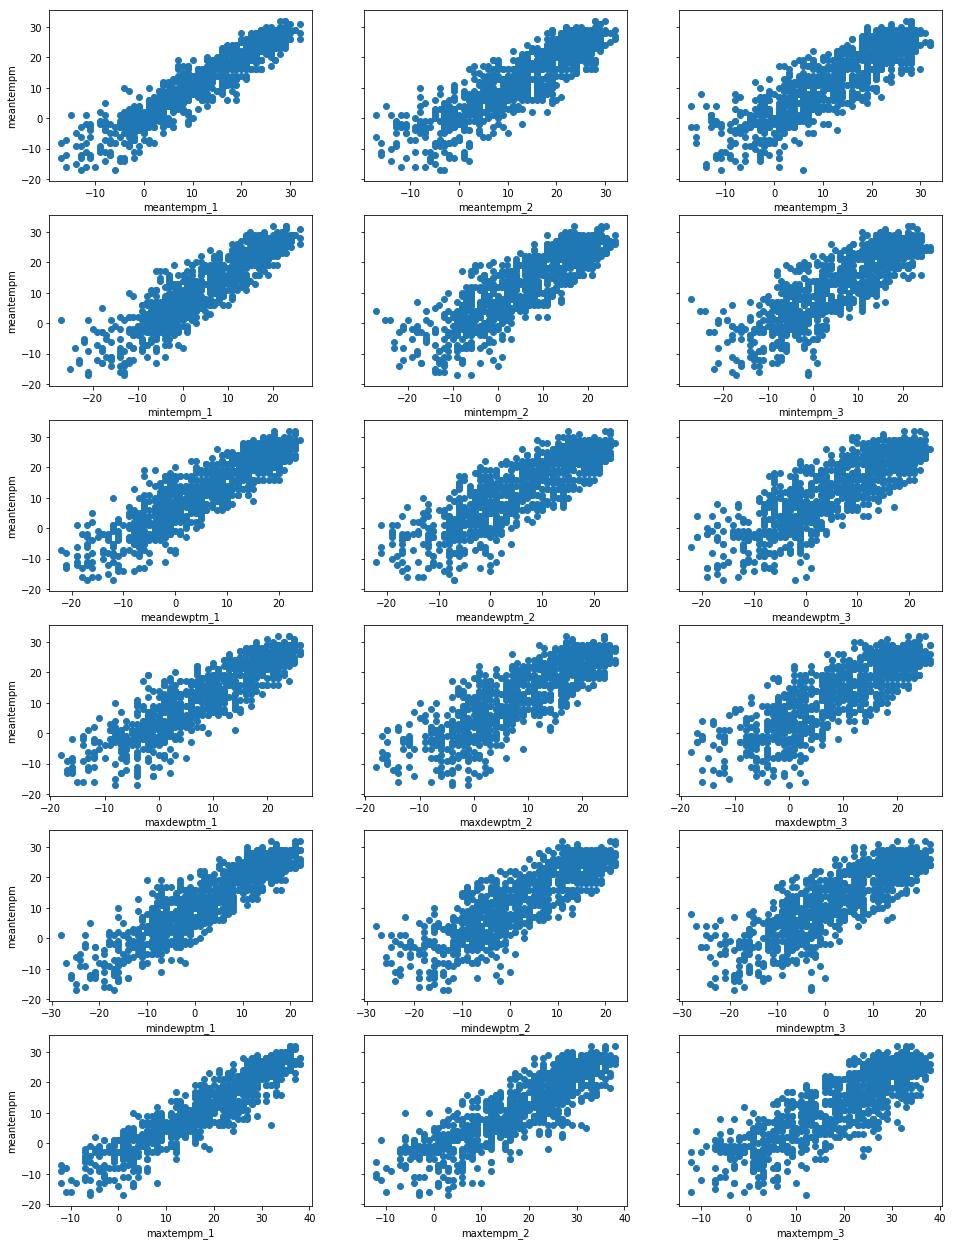

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 22]
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

arr = np.array(predictors).reshape(6, 3)

for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['meantempm'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='meantempm')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

We see that the remaining predictor variables show a good linear relationship with the response variable (meantempm).

### Using step-wise regression to build a robust model.

Backwards elimination is used for selecting statistically significant predictors. We can remove those predictors based on the results of this test.


In [7]:
import statsmodels.api as sm

# Separate the predictors from the response variable
X = df2[predictors]
y = df2['meantempm']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)
X.ix[:5, :5]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,const,meantempm_1,meantempm_2,meantempm_3,mintempm_1
date,,,,,
2015-01-04,1.0,-4.0,-6.0,-6.0,-13.0
2015-01-05,1.0,-14.0,-4.0,-6.0,-18.0
2015-01-06,1.0,-9.0,-14.0,-4.0,-14.0
2015-01-07,1.0,-10.0,-9.0,-14.0,-14.0
2015-01-08,1.0,-16.0,-10.0,-9.0,-19.0


In [8]:
# (1) Select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) Evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     462.7
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        01:56:48   Log-Likelihood:                -2679.2
No. Observations:                 997   AIC:                             5396.
Df Residuals:                     978   BIC:                             5490.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0769      0.526      2.049      0.041       0.046       2.108
meantempm_1      0.1047      0.287      0.364      0.716      -0.459       0.669
meantempm_2      0.3512      0.287      1.225      0.221      -0.211       0.914
meantempm_3     -0.1084      0.286     -0.379      0.705      -0.669       0.453
mintempm_1       0.0805      0.149      0.539      0.590      -0.213       0.373
mintempm_2      -0.2371      0.149     -1.587      0.113      -0.530       0.056
mintempm_3       0.1521      0.148      1.028      0.304      -0.138       0.443
meandewptm_1    -0.0418      0.138     -0.304      0.761      -0.312       0.228
meandewptm_2    -0.0121      0.138     -0.088      0.930      -0.282       0.258
meandewptm_3    -0.0060      0.137     -0.044      0.965      -0.275       0.263
maxdewptm_1     -0.1592      0.091     -1.756      0.079      -0.337       0.019
maxdewptm_2     -0.0113      0.091     -0.125      0.900      -0.189       0.166
maxdewptm_3      0.1326      0.089      1.492      0.136      -0.042       0.307
mindewptm_1      0.3638      0.084      4.346      0.000       0.200       0.528
mindewptm_2     -0.0119      0.088     -0.136      0.892      -0.184       0.160
mindewptm_3     -0.0239      0.086     -0.279      0.780      -0.192       0.144
maxtempm_1       0.5042      0.147      3.438      0.001       0.216       0.792
maxtempm_2      -0.2154      0.147     -1.464      0.143      -0.504       0.073
maxtempm_3       0.0809      0.146      0.555      0.579      -0.205       0.367
==============================================================================
Omnibus:                       13.252   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.097
Skew:                          -0.163   Prob(JB):                     0.000194
Kurtosis:                       3.552   Cond. No.                         291.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# (4) Identify the predictor with the greatest p-value and 
#     assess if it's > the selected alpha

#     Above, meandewptm_3 has the greatest p-value and that it is
#     greater than our alpha of 0.05

# (5) Drop the predictor identified in (4)
X = X.drop('meandewptm_3', axis=1)

# (6) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     490.4
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        01:58:06   Log-Likelihood:                -2679.2
No. Observations:                 997   AIC:                             5394.
Df Residuals:                     979   BIC:                             5483.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0771      0.525      2.051      0.041       0.046       2.108
meantempm_1      0.1040      0.287      0.363      0.717      -0.459       0.667
meantempm_2      0.3513      0.286      1.226      0.220      -0.211       0.913
meantempm_3     -0.1082      0.286     -0.379      0.705      -0.669       0.452
mintempm_1       0.0809      0.149      0.543      0.587      -0.211       0.373
mintempm_2      -0.2371      0.149     -1.588      0.113      -0.530       0.056
mintempm_3       0.1520      0.148      1.028      0.304      -0.138       0.442
meandewptm_1    -0.0419      0.137     -0.305      0.761      -0.312       0.228
meandewptm_2    -0.0121      0.138     -0.088      0.930      -0.282       0.258
maxdewptm_1     -0.1592      0.091     -1.757      0.079      -0.337       0.019
maxdewptm_2     -0.0115      0.090     -0.127      0.899      -0.189       0.166
maxdewptm_3      0.1293      0.048      2.705      0.007       0.036       0.223
mindewptm_1      0.3638      0.084      4.349      0.000       0.200       0.528
mindewptm_2     -0.0119      0.088     -0.135      0.892      -0.184       0.160
mindewptm_3     -0.0266      0.058     -0.456      0.648      -0.141       0.088
maxtempm_1       0.5046      0.146      3.448      0.001       0.217       0.792
maxtempm_2      -0.2154      0.147     -1.465      0.143      -0.504       0.073
maxtempm_3       0.0809      0.146      0.556      0.579      -0.205       0.367
==============================================================================
Omnibus:                       13.254   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.105
Skew:                          -0.163   Prob(JB):                     0.000193
Kurtosis:                       3.553   Cond. No.                         286.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Keep only the variables that pass the criterion.

In [0]:
X = X[['const','mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1', 'maxdewptm_3', 'mindewptm_1', 'maxtempm_1']]

Below is the output from the final model. All the remaining predictors each have a p-value significantly below the selected $\alpha$ of 0.05. 

Other observations:
1.   The r-squared and adj. r-squared values are both equal which suggests that there is minimal risk that the model is being over fitted by excessive variables.
2.   The value of 0.894 is interpreted such that the final model explains about 90% of the observed variation in the outcome variable, the meantempm.




In [12]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1196.
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        02:00:52   Log-Likelihood:                -2681.7
No. Observations:                 997   AIC:                             5379.
Df Residuals:                     989   BIC:                             5419.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1534      0.411      2.804      0.005       0.346       1.961
mintempm_1      0.1310      0.053      2.458      0.014       0.026       0.236
mintempm_2     -0.0964      0.037     -2.620      0.009      -0.169      -0.024
mintempm_3      0.0886      0.041      2.183      0.029       0.009       0.168
maxdewptm_1    -0.1939      0.047     -4.117      0.000      -0.286      -0.101
maxdewptm_3     0.1269      0.040      3.191      0.001       0.049       0.205
mindewptm_1     0.3352      0.051      6.605      0.000       0.236       0.435
maxtempm_1      0.5506      0.024     22.507      0.000       0.503       0.599
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.871
Skew:                          -0.163   Prob(JB):                     0.000217
Kurtosis:                       3.548   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predict using sklearn's Linear Regression model.
Train the dataset on sklearn's Linear Regression model.



### Split the data into training and test sets.

In [0]:
from sklearn.model_selection import train_test_split

# const column is not needed here
X = X.drop('const', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### Train and test.

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

prediction = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees Celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees Celsius" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.90
The Mean Absolute Error: 2.69 degrees Celsius
The Median Absolute Error: 2.17 degrees Celsius


The model is able to explain about 90% of the variance observed in the outcome variable, mean temperature.  Additionally, on average the predicted value is about 3 degrees Celsius off and half of the time it is off by about 2 degrees Celsius.

### Save the model.
Since our focus is not so much on building a really good machine learning model, this one gives us decent enough results so we save it in a pickle file. This file can be downloaded from the Files tab in Google Colab.

In [0]:
import pickle
# save the model to disk
filename = 'linear_regression_model.sav'
pickle.dump(regressor, open(filename, 'wb'))